In [2]:
import pandas as pd
from sklearn.neighbors import NearestNeighbors
from scipy.sparse import csr_matrix


In [3]:
geo_df = pd.read_csv("STATE_GEO_TAG.csv",encoding="ISO-8859-1")
rating_df = pd.read_csv("ratings.csv",usecols=['userId', 'rating'], dtype={'userId': 'int32', 'rating': 'float32'})

In [4]:
geo_df.head()

,Sno.,App.No.,Geographical Indications,Status,Goods,State
0,1,0143,Guntur Sannam Chilli,Registered,Agricultural,Andhra Pradesh
1,2,0121,Tirupathi Laddu,Registered,Food Stuff,Andhra Pradesh
2,3,0433,Bandar Laddu,Registered,Food Stuff,Andhra Pradesh
3,4,0804,Atreyapuram Pootharekulu,Registered,Food Stuff,Andhra Pradesh
4,5,0028,Srikalahasthi Kalamkari,Registered,Handicraft,Andhra Pradesh


In [5]:
rating_df = rating_df.iloc[:605]

In [6]:
rating_df.head()

,userId,rating
0,1,4.0
1,1,4.0
2,1,4.0
3,1,5.0
4,1,5.0


In [7]:
geo_df['userId'] = rating_df['userId']

In [8]:
geo_df.head()

,Sno.,App.No.,Geographical Indications,Status,Goods,State,userId
0,1,0143,Guntur Sannam Chilli,Registered,Agricultural,Andhra Pradesh,1
1,2,0121,Tirupathi Laddu,Registered,Food Stuff,Andhra Pradesh,1
2,3,0433,Bandar Laddu,Registered,Food Stuff,Andhra Pradesh,1
3,4,0804,Atreyapuram Pootharekulu,Registered,Food Stuff,Andhra Pradesh,1
4,5,0028,Srikalahasthi Kalamkari,Registered,Handicraft,Andhra Pradesh,1


In [9]:
geo_df["Geographical Indications"] = geo_df["Geographical Indications"].apply(lambda x: x.lower())

In [10]:
geo_df.head()

,Sno.,App.No.,Geographical Indications,Status,Goods,State,userId
0,1,0143,guntur sannam chilli,Registered,Agricultural,Andhra Pradesh,1
1,2,0121,tirupathi laddu,Registered,Food Stuff,Andhra Pradesh,1
2,3,0433,bandar laddu,Registered,Food Stuff,Andhra Pradesh,1
3,4,0804,atreyapuram pootharekulu,Registered,Food Stuff,Andhra Pradesh,1
4,5,0028,srikalahasthi kalamkari,Registered,Handicraft,Andhra Pradesh,1


In [11]:
geo_df['rating'] = rating_df['rating']

In [12]:
df = rating_df.copy()
df["itemId"] = df.index % len(geo_df)

In [13]:
df.head()

,userId,rating,itemId
0,1,4.0,0
1,1,4.0,1
2,1,4.0,2
3,1,5.0,3
4,1,5.0,4


In [14]:
user_item_matrix = df.pivot(index='userId', columns='itemId', values='rating').fillna(0)


In [15]:
user_item_matrix.head()


itemId,0,1,2,3,4,5,6,7,8,9,...,595,596,597,598,599,600,601,602,603,604
userId,,,,,,,,,,,,,,,,,,,,,
1,4.0,4.0,4.0,5.0,5.0,3.0,5.0,4.0,5.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [16]:
sparse_matrix = csr_matrix(user_item_matrix.values)

In [17]:
print(sparse_matrix)

<Compressed Sparse Row sparse matrix of dtype 'float32'
	with 605 stored elements and shape (6, 605)>
  Coords	Values
  (0, 0)	4.0
  (0, 1)	4.0
  (0, 2)	4.0
  (0, 3)	5.0
  (0, 4)	5.0
  (0, 5)	3.0
  (0, 6)	5.0
  (0, 7)	4.0
  (0, 8)	5.0
  (0, 9)	5.0
  (0, 10)	5.0
  (0, 11)	5.0
  (0, 12)	3.0
  (0, 13)	5.0
  (0, 14)	4.0
  (0, 15)	5.0
  (0, 16)	3.0
  (0, 17)	3.0
  (0, 18)	5.0
  (0, 19)	4.0
  (0, 20)	4.0
  (0, 21)	5.0
  (0, 22)	4.0
  (0, 23)	3.0
  (0, 24)	4.0
  :	:
  (5, 580)	3.0
  (5, 581)	4.0
  (5, 582)	4.0
  (5, 583)	5.0
  (5, 584)	4.0
  (5, 585)	4.0
  (5, 586)	3.0
  (5, 587)	4.0
  (5, 588)	4.0
  (5, 589)	1.0
  (5, 590)	4.0
  (5, 591)	4.0
  (5, 592)	4.0
  (5, 593)	4.0
  (5, 594)	3.0
  (5, 595)	3.0
  (5, 596)	4.0
  (5, 597)	3.0
  (5, 598)	5.0
  (5, 599)	3.0
  (5, 600)	2.0
  (5, 601)	4.0
  (5, 602)	4.0
  (5, 603)	4.0
  (5, 604)	4.0


In [18]:
model = NearestNeighbors(metric='cosine', algorithm='brute', n_neighbors=5)

In [19]:
model.fit(sparse_matrix)


NearestNeighbors(algorithm='brute', metric='cosine')

In [20]:
def recommend(user_id, num_recommendations=5):
    if user_id not in user_item_matrix.index:
        return "User not found."
    
    user_idx = user_item_matrix.index.get_loc(user_id)
    distances, indices = model.kneighbors([sparse_matrix[user_idx].toarray()[0]], n_neighbors=num_recommendations+1)
    
    recommended_items = [user_item_matrix.columns[i] for i in indices.flatten()[1:]]
    return geo_df.iloc[recommended_items]["Geographical Indications"].values


In [21]:
print(recommend(user_id=1, num_recommendations=5))

['tirupathi laddu' 'bandar laddu' 'atreyapuram pootharekulu'
 'srikalahasthi kalamkari' 'kondapalli bommalu']


In [22]:
def recommend(product_name, num_recommendations=5):
    if product_name not in geo_df["Geographical Indications"].values:
        return "Product not found."
    
    product_idx = geo_df[geo_df["Geographical Indications"] == product_name].index[0]
    distances, indices = model.kneighbors([sparse_matrix[product_idx].toarray()[0]], n_neighbors=num_recommendations+1)
    
    recommended_items = [geo_df.iloc[i]["Geographical Indications"] for i in indices.flatten()[1:]]
    return recommended_items

In [23]:
proudct_name_ = input("Enter the name of the product: ").strip()

In [24]:
print(proudct_name_)

bandar laddu


In [25]:
recommend(product_name="bandar laddu", num_recommendations=5)


['guntur sannam chilli',
 'tirupathi laddu',
 'atreyapuram pootharekulu',
 'srikalahasthi kalamkari',
 'kondapalli bommalu']

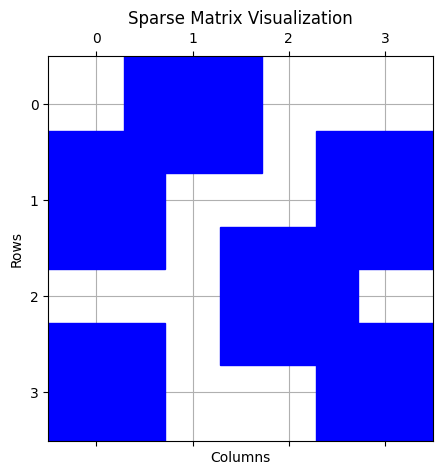

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse import csr_matrix


data = np.array([5, 3, 2, 4, 6, 7])
indices = np.array([1, 0, 3, 2, 0, 3])
indptr = np.array([0, 1, 3, 4, 6])

num_rows = len(indptr) - 1
num_cols = max(indices) + 1  
sparse_matrix = csr_matrix((data, indices, indptr), shape=(num_rows, num_cols))


dense_matrix = sparse_matrix.toarray()


plt.figure(figsize=(5, 5))
plt.spy(sparse_matrix, markersize=100, color='blue') 
plt.title("Sparse Matrix Visualization")
plt.xlabel("Columns")
plt.ylabel("Rows")
plt.grid(True)
plt.show()


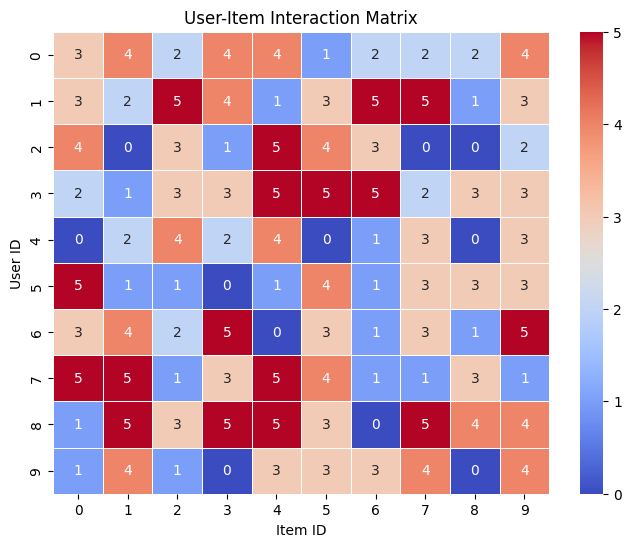

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


np.random.seed(42)
ratings = np.random.randint(0, 6, (10, 10))  

plt.figure(figsize=(8, 6))
sns.heatmap(ratings, annot=True, cmap="coolwarm", linewidths=0.5)

plt.xlabel("Item ID")
plt.ylabel("User ID")
plt.title("User-Item Interaction Matrix")
plt.show()